#### Import Dependencies 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler

#### Read Data 

In [2]:
X_train = np.asarray(np.load("X_train.npy").tolist()).T
X_test = np.asarray(np.load("X_test.npy").tolist()).T
y_train = np.asarray(np.load("Y_train.npy").tolist())[:, np.newaxis].T
y_test = np.asarray(np.load("Y_test.npy").tolist())[:, np.newaxis].T

#### Data Preprocessing 

In [3]:
# Feature Scaling
# scaler = StandardScaler()
# scaler.fit(X_train.T)
# X_train = scaler.transform(X_train.T).T
# X_test = scaler.transform(X_test.T).T
# Append Ones to X_train and X_test
X_train = np.concatenate((np.ones((1, X_train.shape[1])), X_train), axis=0)
X_test = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis=0)

In [4]:
print("X_train: " + str(X_train.shape))
print("y_train: " + str(y_train.shape))
print("X_test:  " + str(X_test.shape))
print("y_test:  " + str(y_test.shape))

X_train: (4, 10000)
y_train: (1, 10000)
X_test:  (4, 500)
y_test:  (1, 500)


#### Perceptron Algorithm 

In [5]:
class Perceptron:
    def __init__(self, n_epochs, input_dim, learning_rate=1):
        self.n_epochs = n_epochs
        self.input_dim = input_dim
        self.learning_rate = learning_rate
        self.weights = np.zeros((input_dim, 1))
        self.true_risks = []
        self.empirical_risks = []

    def predict(self, X):
        return np.sign(self.weights.T @ X)

    def loss(self, X, y):
        return (self.predict(X) != y).mean()

    def train(self, X_train, y_train, X_test, y_test, verbose=False):
        self.true_risks = []
        self.empirical_risks = []
        for epoch in range(1, self.n_epochs+1):
            # Find the wrong sample
            for x_sample, y_sample in zip(X_train.T, y_train.T):
                x_sample = x_sample[:, np.newaxis]
                prediction = self.predict(x_sample)
                if y_sample != prediction:  # Is this sample predeicted wrongly?
                    # Learn!
                    self.weights += self.learning_rate * y_sample * x_sample
                    break
                # All samples classified correctly. Time to return!
            if epoch % 500 == 0:
                true_risk = self.loss(X_test, y_test)
                empirical_risk = self.loss(X_train, y_train)
                self.true_risks.append((epoch ,true_risk))
                self.empirical_risks.append((epoch ,empirical_risk))
                if verbose:
                    print(
                        "{:5d}: train loss = {:.4f} | test loss = {:.4f}".format(epoch, empirical_risk, true_risk))
        return

    def plot_risks(self):
        x, y=zip(*self.empirical_risks)
        plt.plot(x, y, label='Empirical')
        x, y=zip(*self.true_risks)
        plt.plot(x, y, label='True')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend()

  500: train loss = 0.1447 | test loss = 0.1640
 1000: train loss = 0.9013 | test loss = 0.8960
 1500: train loss = 0.8973 | test loss = 0.8960
 2000: train loss = 0.7754 | test loss = 0.7900
 2500: train loss = 0.1401 | test loss = 0.1600
 3000: train loss = 0.8927 | test loss = 0.8860
 3500: train loss = 0.1350 | test loss = 0.1540
 4000: train loss = 0.8707 | test loss = 0.8600
 4500: train loss = 0.1365 | test loss = 0.1580
 5000: train loss = 0.1277 | test loss = 0.1480
 5500: train loss = 0.1241 | test loss = 0.1400
 6000: train loss = 0.3468 | test loss = 0.3740
 6500: train loss = 0.8612 | test loss = 0.8480
 7000: train loss = 0.1233 | test loss = 0.1440
 7500: train loss = 0.1121 | test loss = 0.1340
 8000: train loss = 0.8542 | test loss = 0.8340
 8500: train loss = 0.8464 | test loss = 0.8260
 9000: train loss = 0.1040 | test loss = 0.1180
 9500: train loss = 0.1143 | test loss = 0.1360
10000: train loss = 0.0962 | test loss = 0.1140


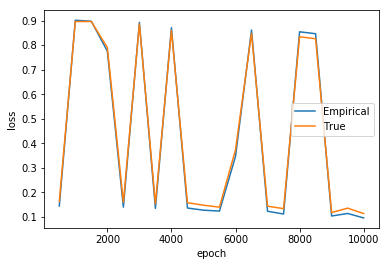

In [6]:
clf = Perceptron(10000, 4)
clf.train(X_train, y_train, X_test, y_test, verbose=True)
clf.plot_risks()

In [7]:
print(clf.weights)

[[  3014.        ]
 [-13733.47372217]
 [  -896.86018078]
 [ 54055.68993876]]


##### Test Perceptron with sklearn 

In [8]:
from sklearn.linear_model import Perceptron as SKPerceptron

In [9]:
SK_X_train = X_train[1:, :].T
SK_y_train = y_train.T
SK_X_test = X_test[1:, :].T
SK_y_test = y_test.T

In [10]:
clf = SKPerceptron(tol=1e-3, random_state=42, max_iter=10000)
clf.fit(SK_X_train, SK_y_train)

/home/alireza/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=10000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=0.001,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
print('Score on train set: ' + str(clf.score(SK_X_train, SK_y_train)))
print('Score on test set: ' + str(clf.score(SK_X_test, SK_y_test)))

Score on train set: 0.9555
Score on test set: 0.946


In [12]:
print(clf.intercept_)
print(clf.coef_)

[1337.]
[[ -547.27905604 -1851.25522011 82291.71967533]]


##### With ‫ψ‬

In [13]:
X_train[3] = X_train[3] ** 3
X_test[3] = X_test[3] ** 3

  500: train loss = 0.0049 | test loss = 0.0040
 1000: train loss = 0.0412 | test loss = 0.0500
 1500: train loss = 0.0205 | test loss = 0.0220
 2000: train loss = 0.0007 | test loss = 0.0000
 2500: train loss = 0.0005 | test loss = 0.0000
 3000: train loss = 0.0008 | test loss = 0.0000
 3500: train loss = 0.0115 | test loss = 0.0060
 4000: train loss = 0.0035 | test loss = 0.0020
 4500: train loss = 0.0031 | test loss = 0.0020
 5000: train loss = 0.0048 | test loss = 0.0040
 5500: train loss = 0.0022 | test loss = 0.0000
 6000: train loss = 0.0082 | test loss = 0.0060
 6500: train loss = 0.0150 | test loss = 0.0100
 7000: train loss = 0.0047 | test loss = 0.0040
 7500: train loss = 0.0016 | test loss = 0.0020
 8000: train loss = 0.0162 | test loss = 0.0160
 8500: train loss = 0.0057 | test loss = 0.0060
 9000: train loss = 0.0025 | test loss = 0.0020
 9500: train loss = 0.0055 | test loss = 0.0060
10000: train loss = 0.0060 | test loss = 0.0060


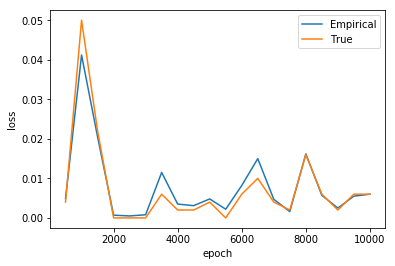

In [14]:
clf = Perceptron(10000, 4)
clf.train(X_train, y_train, X_test, y_test, verbose=True)
clf.plot_risks()

In [15]:
print(clf.weights)

[[   -480.        ]
 [ -80951.0837366 ]
 [-338303.05377963]
 [  56617.97846536]]


#### SVM 

In [16]:
from sklearn import svm

In [17]:
# Reload Data
X_train = np.asarray(np.load("X_train.npy").tolist())
X_test = np.asarray(np.load("X_test.npy").tolist())
y_train = np.asarray(np.load("Y_train.npy").tolist())[:, np.newaxis]
y_test = np.asarray(np.load("Y_test.npy").tolist())[:, np.newaxis]

In [18]:
# Feature Scaling
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [19]:
# Train
clf = svm.LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

/home/alireza/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/alireza/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
print(clf.coef_)
print(clf.intercept_)

[[ 0.00480541 -0.00461761  0.34222259]]
[-2.3059962]


In [21]:
print('Score on train set: ' + str(clf.score(X_train, y_train)))
print('Score on test set: ' + str(clf.score(X_test, y_test)))

Score on train set: 0.9735
Score on test set: 0.972


##### With ‫ψ‬ ‬ 

In [22]:
X_train[:, 2] = X_train[:, 2] ** 3
X_test[:, 2] = X_test[:, 2] ** 3

In [23]:
clf = svm.LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

/home/alireza/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/alireza/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [24]:
print(clf.coef_)
print(clf.intercept_)

[[ 0.01276881 -0.21110163  0.03347801]]
[-0.02382392]


In [25]:
print('Score on train set: ' + str(clf.score(X_train, y_train)))
print('Score on test set: ' + str(clf.score(X_test, y_test)))

Score on train set: 0.9997
Score on test set: 1.0
